In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from DesignMat import Polynomial, Gaussian, Sigmoidal

np.random.seed(1234)
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

def create_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(*domain, sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

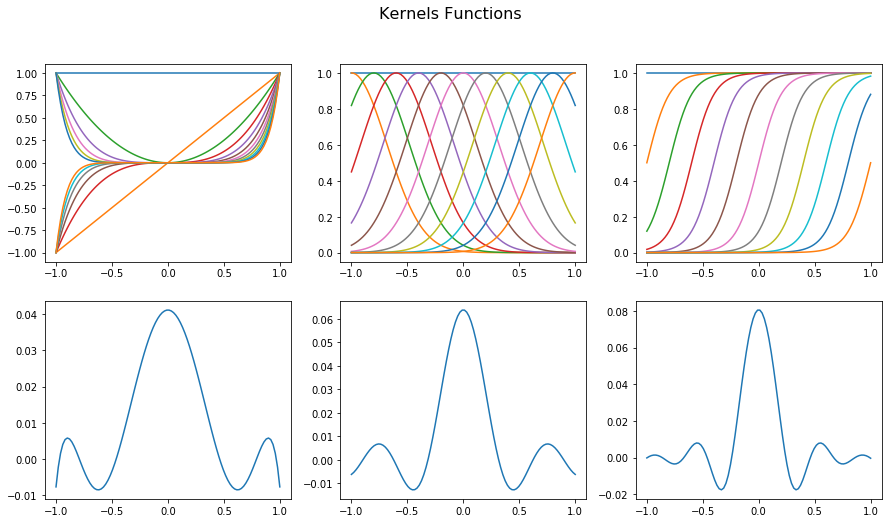

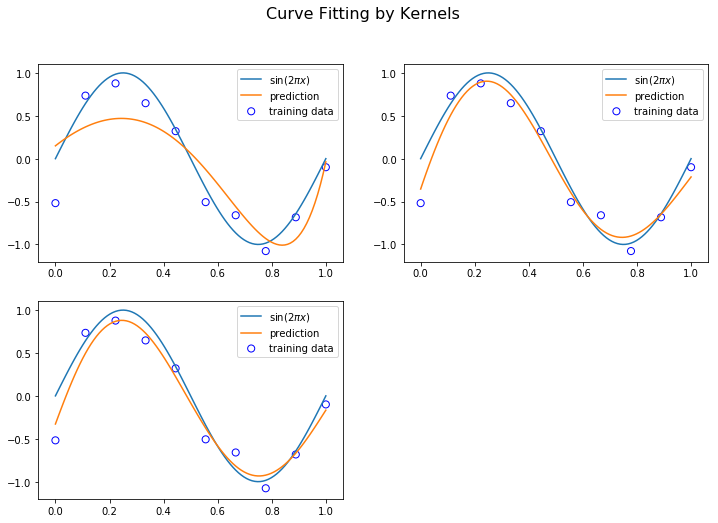

In [2]:
def equiv_kernel(func, x_train, x):
    phi = func.dm(x_train)
    K = phi.dot(phi.T) # Gram matrix
    return np.linalg.inv(np.eye(x_train.shape[0])*0.01 + K).dot(phi.dot(func.dm(x).T)) # see (6.9)

funcs = {'Polynomial': [11], 'Gaussian': [np.linspace(-1, 1, 11), 0.1],'Sigmoidal': [np.linspace(-1, 1, 11), 10]}

x = np.linspace(-1, 1, 100)
x0 = np.array([0])

plt.figure(figsize=(15, 8))
plt.suptitle('Kernels Functions', fontsize=16)
for i, (key, value) in enumerate(funcs.items()):
    plt.subplot(2, 3, i + 1)
    phi = globals()[key](*value).dm(x)
    for j in range(12):
        plt.plot(x, phi[:, j])
    plt.subplot(2, 3, i + 4)
    y = equiv_kernel(globals()[key](*value), x, x0)
    plt.plot(x, y)


x_train, t_train = create_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
t_test = sinusoidal(x_test)

fig = plt.figure(figsize=(12, 8))
plt.suptitle('Curve Fitting by Kernels', fontsize=16)
for i, (key, value) in enumerate(funcs.items()):
    y = equiv_kernel(globals()[key](*value), x_train, x_test)
    t = y.T.dot(t_train)
    plt.subplot(2, 2, i+1)
    plt.scatter(x_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, t_test, label="$\sin(2\pi x)$")
    plt.plot(x_test, t, label="prediction")
    plt.legend()
plt.show()